## Predicting the weight of person using Linear Regression

#### Importing the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Questions import Questions
questions = Questions()

In [3]:
questions.question_six()


        Why the performance of the model is almost perfect in the training set,
        but the model performance is worst than using five neighbors in the
        test set?

        Press 1 for: The model has memorized the training set, but does not
        generalize well on the test set (Overfitting)

        Press 2 for: The model is not able to capture the underlying patterns
        on the data (Underfitting)

        This question is not graded!!
        
Press 1 or 21
Your answer is correct!

        The correct answer is 1!
        What happened is one of the most common symptoms of overfitting.

        The model that you have created is very complex and this model
        doesn't generalize well on unseen data.

        


In [87]:
df = pd.read_csv('weight-height.csv')

#### Assessing the dataset

- Checking the first rows
- Looking for missing values
- Looking for duplicates
- Shape of the dataset

In [75]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


I've done some research and based on the values that are presented in the variables Height and Weight, they're using inches and pounds, respectively, as the unit of measure.

In [76]:
df.shape

(10000, 3)

The dataset has 10000 rows and 3 columns.

In [77]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

- The Gender variable is balanced.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


- There aren't missing values in our dataset
- The types of the variables are correct.

In [79]:
df.duplicated().any()

False

- There aren't duplicated rows in the dataset.

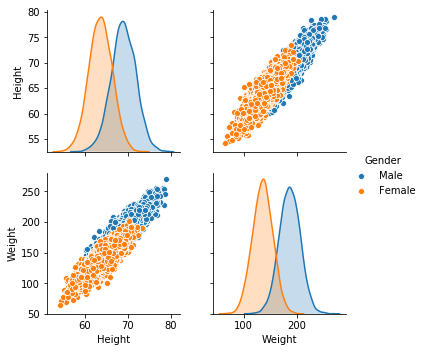

In [80]:
sns.pairplot(df, hue='Gender')

Seaborn is great for exploratory data analysis because with few lines of code you can have meaningful plots that makes our life easier.

- In this case for example, you can see that there is a linear relationship between the variables height and weight.

- Another thing that you can see more clearly by looking at the density plot is that the gender is correlated with the variables height and weight. In the weight variable, for example, the mode is, approximately, 155 pounds for the women and 200 pounds for the men in our sample.

So, the gender and the weight are variables that are suited for creating a linear regression model to predict the weight of a person.

### Data pre-processing

- Transforming the dataset into two numpy arrays (X and y).
- Splitting the dataset into training and test set
- Transforming the variable Gender into a dummy / binary variable

#### Creating the X and y arrays

In machine learning, usually, is a good practice to name matrices as uppercase letters and vectors as lower case letters.

In [81]:
# To create the array X, just drop the target variable (Weight).
# and assign the returned values to a new array

X = df.drop('Weight', axis=1).values

# The method .values() is used to transform a pandas series
# or DataFrame into a numpy array.
y = df['Weight'].values

print('Matrix X: ', X, 'Shape:', X.shape, sep='\n')
print()
print('Vector y: ', y, 'Shape:', y.shape, sep='\n')

Matrix X: 
[['Male' 73.847017017515]
 ['Male' 68.78190404589029]
 ['Male' 74.11010539178491]
 ...
 ['Female' 63.8679922137577]
 ['Female' 69.03424313073461]
 ['Female' 61.944245879517204]]
Shape:
(10000, 2)

Vector y: 
[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]
Shape:
(10000,)


#### Why you should split your dataset into a training and a test set?

Dataset splitting is very important because of the concept of generalization. The model is only useful if it performs well into data that this model haven't seen yet.

To understand this, I want you to imagine that you're studing for an exam. In order to be able to get a good score, you have to learn how to solve the problems, not memorize the answers of the questions that you've used to learn. The same is applied to machine learning models, we must guarantee that our model is learning the correlations of our data, not memorizing it, because in this way, our model will perform well in unseen data.

But, how do we get to see how our model will perform well in unseen data, if we don't have this data yet?

The people who have been working with data for a long time, has created a solution for this.

Basically, you split your dataset into a training and test set. Your model is trained in the training set, and you use the parameters that have been learnt by the model to predict the values of the target variable using the test set as parameter.

After that, you evaluate your model by comparing the predicted values with the observed values.



#### Splitting the dataset

In [82]:
# The random state is a very important parameter because it creates 
# a seed, that if some other person is trying
# to reproduce your model, if the value of the random_state
# is the same, all else being equal, he'll get the same results as you.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, 
                                                    test_size=0.25)

#### Categorical variables

Before creating a ML model, you must transform your categorical variables into numbers.

In the case of this dataset, we're dealing with a nominal categorical variable with two categories. So, we must transform the variable into a binary variable.

1. Pandas:
    - pd.get_dummies(drop_first=True)
2. Numpy Arrays:
    - LabelEncoder()
    - LabelBinarizer()
    
One important thing to say about data pre-processing, is that you have to be careful about Data Leakage. Data Leakage is when you some information outside of the training set is used in the model that is being trained.

The Sklearn Library minimize this because in most of the preprocessing methods, there is two methods: 
- fit_transform()
- transform()

The fit_transform is used to save the parameters of the X_train and, at the same time, it transforms the X_train in the desired format. The transform method uses the parameters that were saved by the fit_transform method and transforms the test set into the same format as the X_train.

In order to understand this, imagine that you have some missing values in a categorical variable and you want to use the sklearn object Imputer to impute those values with the mode of the variable. Sklearn will check the most frequent value in this variable on the training set and will transform the training set. Then, when you use the transform method on the test set, he will take the mode of training set and will replace the missing values of the test set using this value, even if the mode of the test set is different from the training set.


In [83]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X_train[:, 0] = label.fit_transform(X_train[:, 0])
X_test[:, 0] = label.transform(X_test[:, 0])

In [84]:
X_train[:, 0]

array([1, 0, 0, ..., 1, 0, 1], dtype=object)

#### Exercise One
- Fit a linear regression model, make the predictions on the test set and calculate the root mean squared error.

In [21]:
# Type your code here


In [34]:
# Run this cell to check your results
questions.question_one()

#### What is the weight of woman with 75 inches

In [57]:
# Type your code here

In [69]:
# Run this cell to check your results
questions.question_two()

202.44000000000005

#### Using the default parameters, create a KNN model and evaluate it using RMSE.
- The documentation for creating a KNeighborsRegressor can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [ ]:
# Type your code here

#### What is the MSE for the model, using KNNs?

In [58]:
# Run this code 
questions.question_three()

As you may have seen in the documentation of KNeighborsRegressor, the default value for the number of neighbors is 5. What happens if you place the parameter n_neighbors=1 in the model?

##### What is the performance of the model in the training set?

       - Hint: Just replace the value of X_test for the value of X_train, to get the
       predictions of the model on the training set.

In [62]:
# Type your code here

In [85]:
# Run this code to check if your answer is correct
questions.question_four()

What is the RMSE of the KNN model on the test set, using
n_neighbors=1 as parameter of the model?
(two decimal places)
Type your answer here!14.94
Your answer is not correct, try again!!


##### What is the performance of the model in the test set?


In [ ]:
# Type your code here

In [4]:
questions.question_five()


        What is the RMSE of the KNN model on the test set, using n_neighbors
        as parameter of the model?
        (two decimal places)
        
Type your answer here!14.09
Your answer is correct, congratulations!!


#### Checking your overall results

In [5]:
# Run this cell
questions.print_results()

Keep working! You have answered correctly 1 out of 5 questions!
